**Задание**
При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
from matplotlib import pyplot as plt

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [3]:
result.x, result.fun

(array([0., 0.]), 4.440892098500626e-16)

**Параметр strategy**

варианты:'best1bin','best1exp','rand1exp','randtobest1exp','currenttobest1exp','best2exp','rand2exp','randtobest1bin',
            'currenttobest1bin','best2bin','rand2bin','rand1bin', где best1bin - по умолчанию

In [4]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, strategy='best1exp')
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 4503
     nit: 147
 success: True
       x: array([0., 0.])

Число итераций увеличилось

In [5]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, strategy='best2exp')
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 7413
     nit: 244
 success: True
       x: array([0., 0.])

Число итераций стало еще больше

In [6]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, strategy='currenttobest1exp')
result

     fun: 4.440892098500626e-16
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 30093
     nit: 1000
 success: False
       x: array([0., 0.])

Число итераций увеличилось до 1000

Построим совместный график всех вариантов:

<function matplotlib.pyplot.show(*args, **kw)>

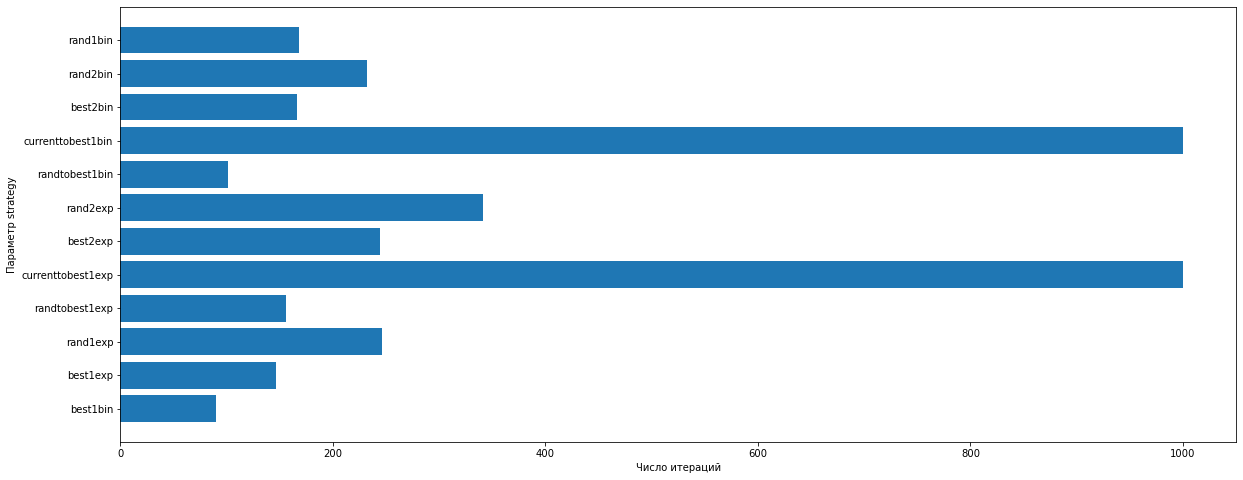

In [7]:
strategy_list = ['best1bin','best1exp','rand1exp','randtobest1exp','currenttobest1exp','best2exp','rand2exp','randtobest1bin',
            'currenttobest1bin','best2bin','rand2bin','rand1bin']
strat = []
for i in strategy_list:
    strat.append(differential_evolution(ackley, bounds, strategy=i, seed=42)['nit'])  

plt.figure(figsize=(20,8))
plt.barh(strategy_list, strat)
plt.xlabel('Число итераций')
plt.ylabel('Параметр strategy')
plt.show

Исходя из графика видно, что наилучший результат по параметру strategy даёт вариант по умолчанию - 'best1bin'

**Параметр popsize**

In [8]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, popsize=10)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2023
     nit: 97
 success: True
       x: array([0., 0.])

In [9]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, popsize=100)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 20463
     nit: 101
 success: True
       x: array([0., 0.])

In [10]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, popsize=1000)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 198063
     nit: 98
 success: True
       x: array([0., 0.])

Параметр popsize слабо влияет на количество итераций

Посторим визуализацию:

<function matplotlib.pyplot.show(*args, **kw)>

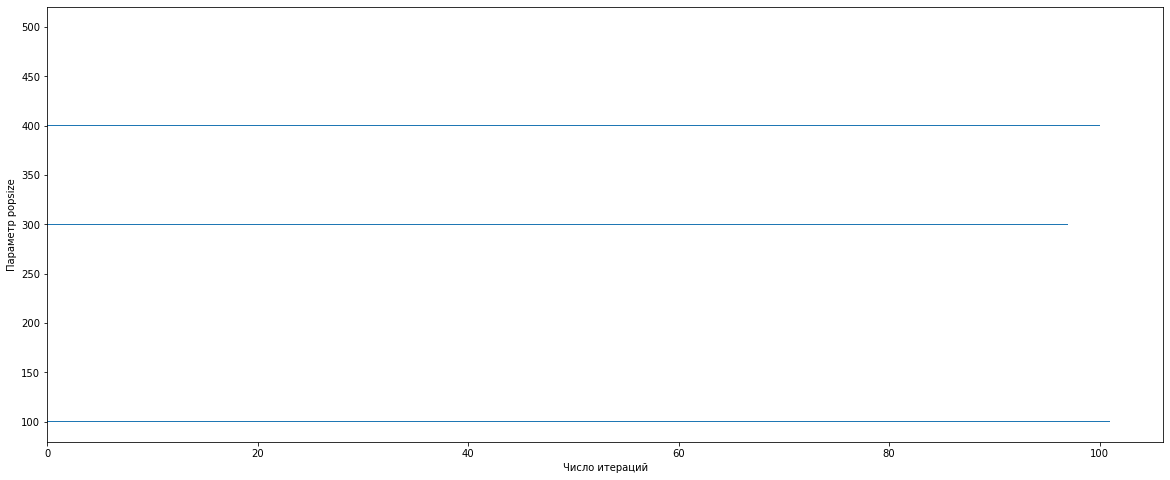

In [16]:
popsize_list = list(range(100, 600, 100))
pop = []
for i in popsize_list:
    pop.append(differential_evolution(ackley, bounds, popsize=i, seed=42)['nit'])  

plt.figure(figsize=(20,8))
plt.barh(popsize_list, pop)
plt.xlabel('Число итераций')
plt.ylabel('Параметр popsize')
plt.show

**Параметр tol**

In [31]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, tol=0.1)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [34]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, tol=0.5)
result

     fun: 2.5799275570298943
     jac: array([1.77635684e-06, 0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 114
     nit: 1
 success: True
       x: array([2.68290800e-08, 9.52166533e-01])

In [33]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, tol=0.9)
result

     fun: 2.5799275570298943
     jac: array([1.77635684e-06, 0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 114
     nit: 1
 success: True
       x: array([2.68290800e-08, 9.52166533e-01])

При увеличении tol количество итераций в какой-то момент резко падает до 1, однако при этом сильно страдает точность x.

Посторим визуализацию:

<function matplotlib.pyplot.show(*args, **kw)>

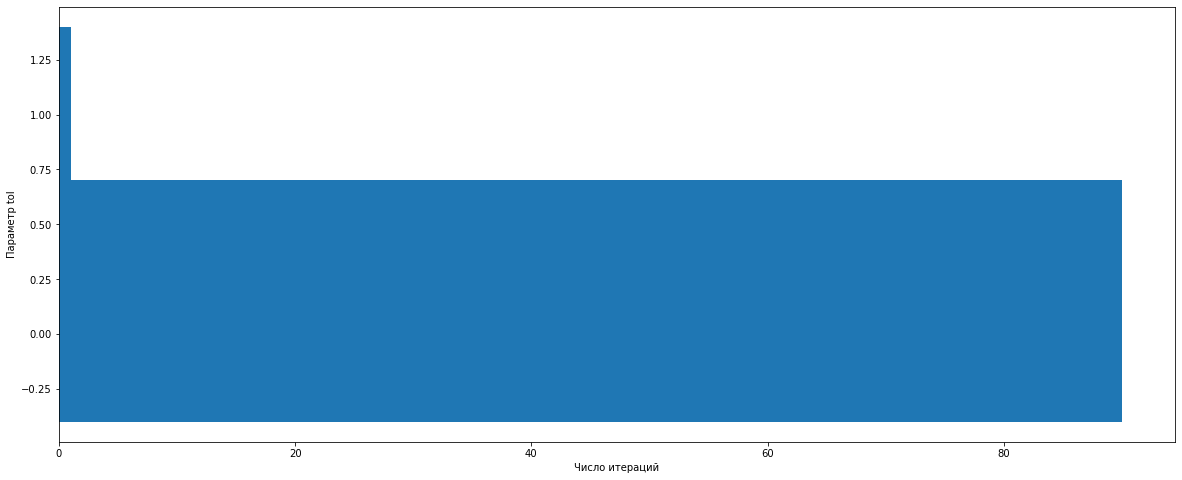

In [34]:
tol_list = np.array(range(0, 11, 1))/10
tl = []
for i in tol_list:
    tl.append(differential_evolution(ackley, bounds, tol=i, seed=42)['nit'])

plt.figure(figsize=(20,8))
plt.barh(tol_list, tl)
plt.xlabel('Число итераций')
plt.ylabel('Параметр tol')
plt.show

Число итераций сокращается с 90 до 1 при установлении параметра tol больше или равного 0,4

**Параметр mutation**

In [36]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, mutation=1)
result

     fun: 7.505107646466058e-14
     jac: array([ 2.82842372, -2.8284262 ])
 message: 'Optimization terminated successfully.'
    nfev: 4230
     nit: 138
 success: True
       x: array([ 1.28476418e-14, -2.26793839e-14])

In [37]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, mutation=0)
result

     fun: 3.5744518772579146
     jac: array([-7.10542732e-07,  4.61852776e-06])
 message: 'Optimization terminated successfully.'
    nfev: 156
     nit: 3
 success: True
       x: array([ 0.96847763, -0.96847757])

При параметре mutation 1 и 0 соответственно получается 138 и 3 итерации (всё понятно и без визуалзации:)))

**Параметр recombination**

In [38]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, recombination=0)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3423
     nit: 111
 success: True
       x: array([0., 0.])

In [39]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, recombination=1)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2553
     nit: 82
 success: True
       x: array([0., 0.])

При параметре recombination 0 и 1 соответственно получается 111 и 82 итерации (всё понятно и без визуалзации:)))

**Параметр updating**

In [41]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, updating='immediate')
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [42]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, updating='deferred')
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3753
     nit: 122
 success: True
       x: array([0., 0.])

<function matplotlib.pyplot.show(*args, **kw)>

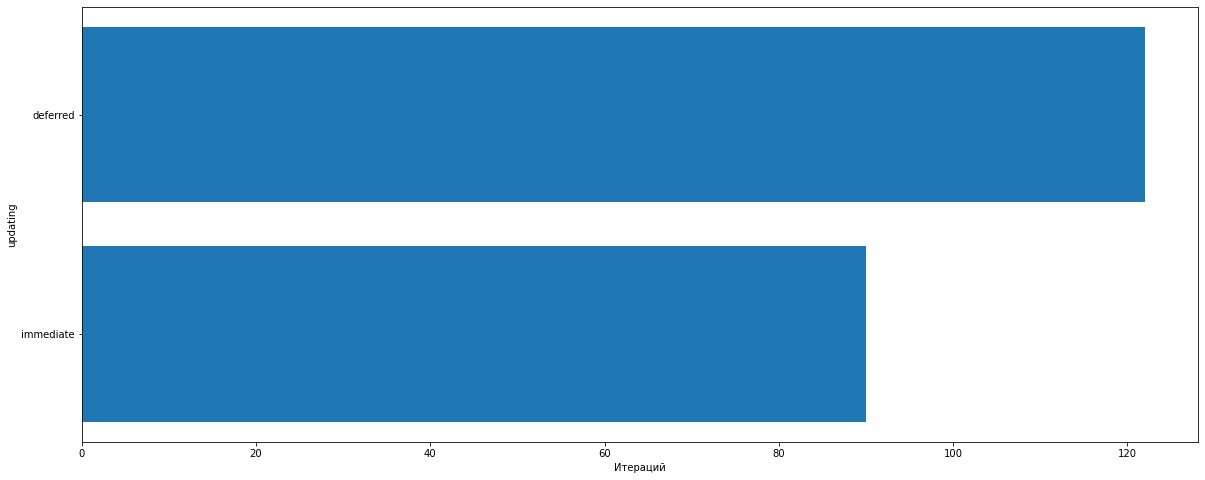

In [43]:
updating = ['immediate','deferred']
res = []
for i in updating:
    res.append(differential_evolution(ackley, bounds, updating=i, seed=42)['nit'])  

plt.figure(figsize=(20,8))
plt.barh(updating, res)
plt.xlabel('Итераций')
plt.ylabel('updating')
plt.show


**Допзадание**
Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

При выставлении tol больше или равного 0,4 количество итераций равно 1, т.е. оно минимально, однако при этом сильно страдает точность x.
Если говорить о минимальном числе итераций при точном результате, то наиболее оптимальным видится вариант по умолчанию, где число итераций = 90.
